<font color = green >


# Clustering 

</font>

Clustering is the task of grouping together similar objects.
<br>
Similarity is a metric that reflects the strength of relationship between two data objects (e.g. distance)

<font color = green >

## K-means

</font>

Algorithm: 
* Initialize $K$ cluster centroids*  
* Repeat till state is stabile: 
       1) assign every point to closest centroid 
       2) compute new centroids as means of samples assigned to corresponding centroid

\*   use multi computation with random initialization of centroids to avoid risk of local optima.

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
%matplotlib inline

<font color = green >

### Data 

</font>


In [5]:
number_samples= 100 
x1,y1 = np.random.randint(0,60,number_samples), np.random.randint(40,100, number_samples)
x2,y2 = np.random.randint(40,100, number_samples), np.random.randint(0,60, number_samples)
x=np.r_[x1,x2]
y=np.r_[y1,y2]

x[:5], y[:5]


(array([15, 29, 52, 43, 14]), array([98, 64, 82, 86, 45]))

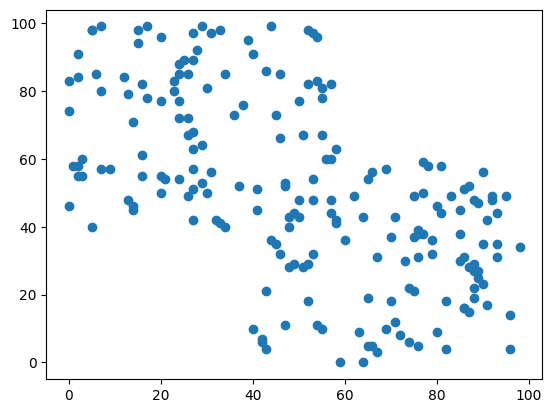

In [6]:
colors = np.array(['green','orange','grey', 'brown'])
def plot_points(x, y, closest_centroids = None):
    if closest_centroids is None:
        plt.scatter(x,y)
    else:
        plt.scatter(x,y, c= colors[closest_centroids])

        
plt.figure()
plot_points(x,y)

<font color = green >

### Init centroids 

</font>


[[20 20]
 [60 80]
 [60 10]
 [90 90]]


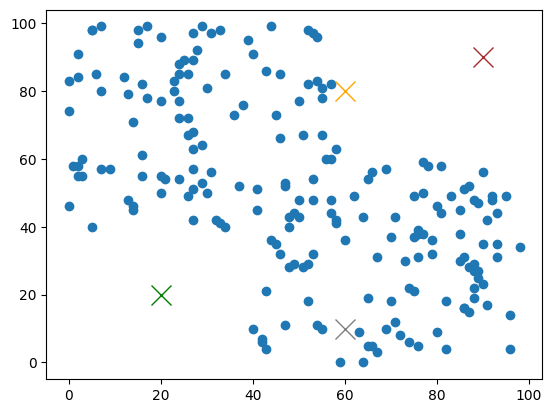

In [7]:
def init_centroids(amount, is_random = True, points = None, seed = 10): 
    if is_random:
        np.random.seed(seed) 
        return points [np.random.choice(len(points), amount)]        
    else:
        centroids = np.array ([(20,20), (60,80), (60,10), (90,90) ])
        return centroids[:amount]

# centroids = init_centroids(2, is_random= False)
centroids = init_centroids(4, is_random= False)
print (centroids)

def plot_centroids(centroids):
    for i, c in enumerate (centroids):
        plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 

def draw_state(x, y, centroids = None, closest_centroids = None):        
    plt.figure ()
    plot_points(x, y, closest_centroids)
    plot_centroids(centroids)

draw_state(x, y, centroids = centroids, closest_centroids=None)

<font color = green >

### Convert data into single array 

</font>


In [8]:
points = np.array(list((zip(x,y))))
points[:5]

array([[15, 98],
       [29, 64],
       [52, 82],
       [43, 86],
       [14, 45]])

<font color = green >

### Compute distances from samples to centroids 

</font>


In [9]:
def compute_distances(samples, centroids):
    '''
    params:
        samples - array of samples(pairs of coordinates) to compute from each the distance to sentroid e.g. array([[17, 83],[50, 67]])
        centroids - array of centroids coordinates e.g. array([[20, 20],[60, 80],[60, 10]])
    retruns: 2d array of distances from each sample to all centroid - the axis 0-centroids, 1-samples 
    '''    
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

# compute_distances(points[:3], centroids[:1]) # Note: make sue it is array/list of centroids not the single centroid  
print(points.shape)
print(centroids.shape)
all_dist = compute_distances(points, centroids)
print(all_dist.shape)
print(all_dist[:5])


(200, 2)
(4, 2)
(4, 200)
[[ 78.16009212  44.91102315  69.77105417  69.89277502  25.70992026
   67.74215822  83.25863319  34.20526275  72.20110802  58.82176468
   68.11754546  79.42921377  37.65634077  83.77350416  29.61418579
   28.86173938  61.81423784  59.41380311  35.22782991  57.
   66.09841148  79.07591289  26.68332813  31.6227766   79.42921377
   57.14017851  25.05992817  42.48529157  37.44329045  36.23534186
   23.08679276  84.30895563  54.4885309   58.6003413   58.6003413
   70.00714249  66.49060084  31.78049716  47.38143096  73.76313442
   38.91015292  43.46262762  64.49806199  39.2173431   66.49060084
   32.80243893  66.48308055  56.30275304  57.38466694  58.07753438
   73.24616031  41.19465985  62.12889827  39.35733731  64.41273166
   57.5847202   72.44308111  51.35172831  53.81449619  24.41311123
   52.83937925  44.10215414  55.36244214  37.80211634  30.
   52.15361924  43.56604182  34.40930107  79.0569415   48.50773134
   34.23448554  74.16872656  36.23534186  60.07495318 

<font color = green >

### Compute Cost 

</font>

It is used to detect the optimization is completed 


In [10]:
def J(centroids, closest_centroids):
    '''
    params: 
        centroids - list/array of pairs (coordinnates)  of centroids e.g. centroids = [(20,20), (60,80), (60,10)]
        closest_centroids - array of len= m (number of samples) that contains indices of centroids e.g. [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2
         1 2 2]
    '''
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = points[np.where(closest_centroids==c_index)]# select only points assigned to centroid
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)


closest_centroids= np.zeros(len(points), dtype=int) # compute for case of all samples assigned to first centroid
print ('Cost= {}'.format(J(centroids, closest_centroids)))



Cost= 55.12921621972334


<font color = green >

### Step 1 of iteration: compute closest centroids 

</font>


shape of closest_centroids:  (200,)
closest_centroids:
 [1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1
 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 2 1 2 0 1 1 2 1 1 0 1 2 1
 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 3 1 2 2 2 1 2 2 2 2 2
 2 1 1 3 2 1 1 2 1 3 2 2 2 1 1 3 1 3 2 2 2 1 2 2 3 1 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 3 2 2 2 2 0 2 2 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 3 2 2 1 2 1 2]
Cost= 30.276491337235868


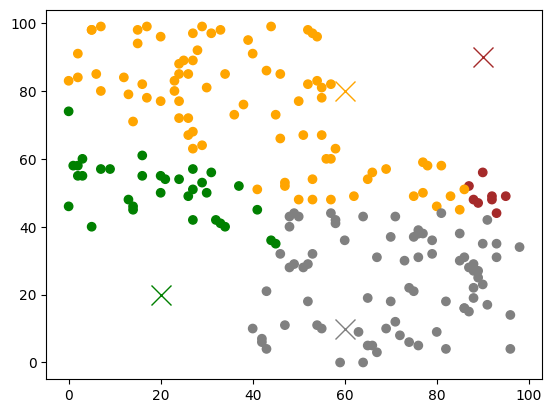

In [13]:
def compute_closest_centroids(centroids):       
    all_distances = compute_distances(points, centroids) #np.array([np.apply_along_axis(np.linalg.norm,1,points-c) for c in centroids])
    closest_centroids = np.apply_along_axis(np.argmin,0,all_distances)
    return closest_centroids

closest_centroids = compute_closest_centroids(centroids) 
print('shape of closest_centroids: ', closest_centroids.shape)
print ('closest_centroids:\n',closest_centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(x,y,centroids = centroids, closest_centroids = closest_centroids)


In [14]:
a = np.array([[1,11,3,4,0],
              [5,10,7,8,100],
              [9,15,11,8,564],
              [13,18,15,16,6]])
print(a)
print(a.shape)
print(np.apply_along_axis(np.argmin,0,a))

[[  1  11   3   4   0]
 [  5  10   7   8 100]
 [  9  15  11   8 564]
 [ 13  18  15  16   6]]
(4, 5)
[0 1 0 0 0]


<font color = green >

### Step 2 of iteration: compute means

</font>


New centroids: [array([19.78787879, 50.81818182]), array([39.36585366, 75.32926829]), array([70.50649351, 24.12987013]), array([90.75 , 49.125])]
Cost= 20.473795414571118


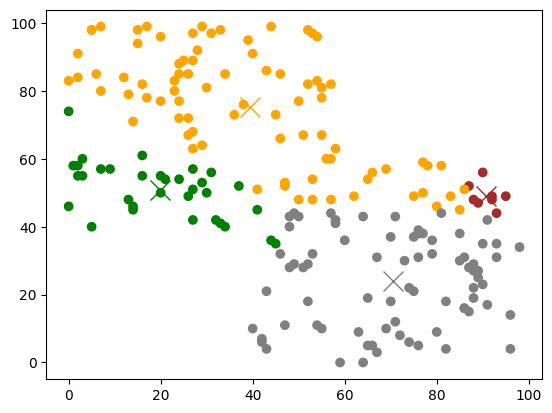

In [15]:
def compute_means(centroids, closest_centroids):     # need to consider all centroids in case of no assigned points to some centroid  
    new_centroids= []
    for i in range (len(centroids)):
        if i not in closest_centroids: # no assigned point assigned to this centroid 
            new_centroids.append(centroids[i])
        else: 
            new_centroid= np.mean(points[np.where(closest_centroids==i)], axis = 0)
            new_centroids.append(new_centroid)
    return new_centroids

centroids = compute_means(centroids, closest_centroids)
print ('New centroids:',centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(x,y, centroids = centroids, closest_centroids = closest_centroids)

<font color = green >

### Iterate

</font>


C:\Users\acer\AppData\Local\Temp\ipykernel_3472\1320170079.py:38: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  a = animation.FuncAnimation(fig, update, interval=2000) # Note: you need to assign this in order to run the animation if you believe it necessary


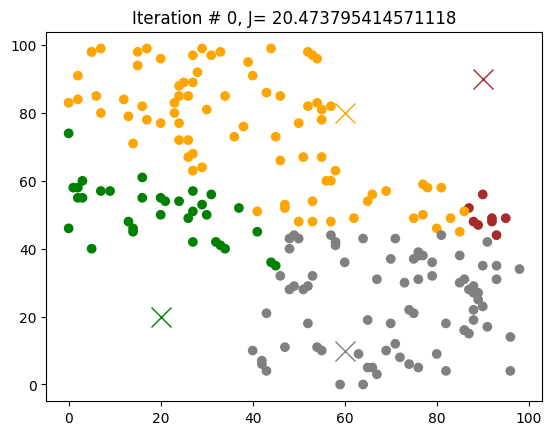

In [16]:
from matplotlib import animation
fig, ax = plt.subplots()


centroids = init_centroids(
    is_random = False, 
    amount =4, 
    points= points,
    seed = 2)
# closest_centroids= compute_closest_centroids(centroids) 

J_hist = [-1] # init -1 to let compare with first value 

def update(curr):

    ax.clear()

    global closest_centroids
    global centroids
    global J_hist

    ax.scatter(x,y, c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        ax.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 


    closest_centroids = compute_closest_centroids(centroids) 
    centroids = compute_means(centroids, closest_centroids)
    
    new_J = J(centroids, closest_centroids)
    if J_hist[-1] == new_J:
        a.event_source.stop()
        
    J_hist.append(J(centroids, closest_centroids))
#     ax.plot(np.random.rand(10)) # use to test annimation is working 
    plt.title('Iteration # {}, J= {}'.format(curr, new_J)) # need to add it once more since it disappears with ax.clear()

a = animation.FuncAnimation(fig, update, interval=2000) # Note: you need to assign this in order to run the animation if you believe it necessary 



<font color = green >

### Another sample

</font>


![K-meams](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

<font color = green >

### Review cost function

</font>


Text(0, 0.5, 'Cost function J')

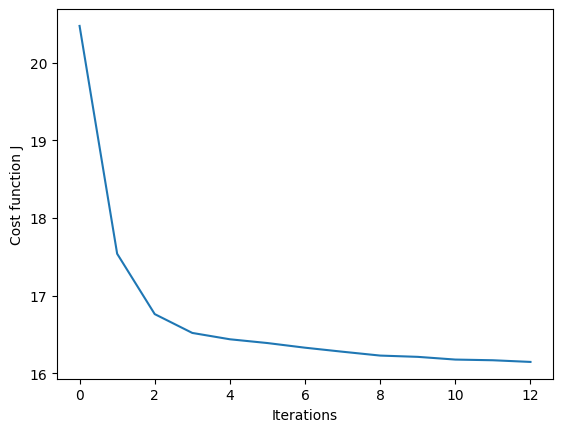

In [17]:
def run_k_means(centroids):
    is_first_time= True 
    J_hist = []
    is_to_continue = True
    
    while is_to_continue:
        closest_centroids = compute_closest_centroids(centroids) 
        centroids = compute_means( centroids , closest_centroids) 
        new_J = J(centroids, closest_centroids)                
        if is_first_time:
            J_hist.append(J(centroids, closest_centroids))            
            is_first_time= False
            continue
        if J_hist[-1] == new_J:
            is_to_continue= False
        else: 
            J_hist.append(J(centroids, closest_centroids))         

    return centroids, closest_centroids, J_hist

centroids= init_centroids(amount = 4, points= points, is_random=False, seed= None )
centroids, closest_centroids, J_hist = run_k_means(centroids)
plt.figure ()
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost function J')



<font color = green >

### Local  optimas

</font>


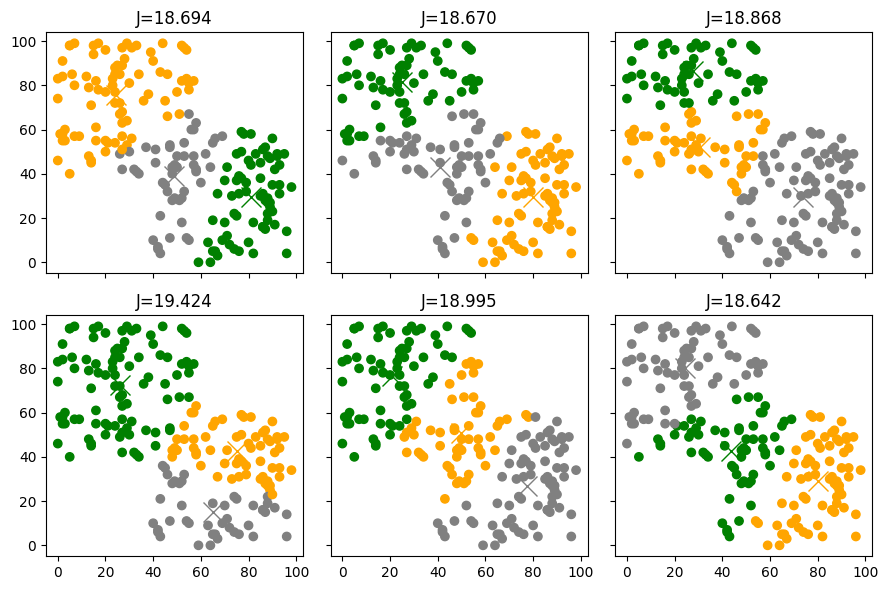

In [18]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize= (9,6))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for index_plot in range (6):
    centroids = init_centroids(is_random = True, amount =3, points= points,seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    print ()
    axes[index_plot].scatter(x,y, c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        axes[index_plot].plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
    plt.sca(axes[index_plot])
    plt.title ('J={:.3f}'.format(J_hist[-1]))

plt.tight_layout()

<font color = green >

### Random initialization

</font>


Text(0.5, 1.0, 'J=18.644')

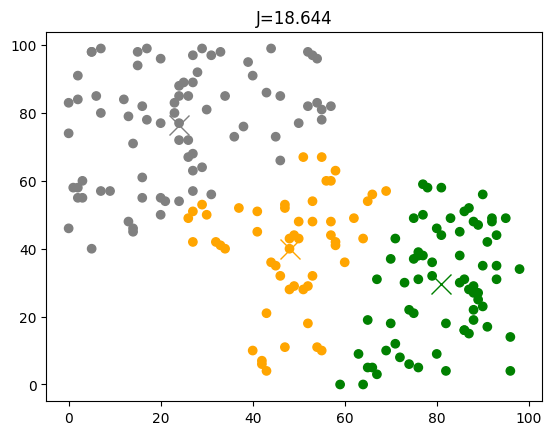

In [19]:
best_result= []

for random_iter in range (100):  
    centroids = init_centroids(amount = 3, points= points, seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    
    if len(best_result)==0 or J_hist[-1] < best_result[2]:
        best_result= [centroids, closest_centroids, J_hist[-1]]

plt.figure()
plt.scatter(x,y, c= colors[best_result[1]])
for i, c in enumerate (best_result[0]):
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
plt.title ('J={:.3f}'.format(best_result[2]))

# 16.079

<font color = green >

## Sklearn kmeans 

</font>

In [20]:
from sklearn.cluster import KMeans

In [21]:
clf = KMeans(n_clusters=4) # n_init : int, default: 10  - Number of time the k-means algorithm will be run with different centroid seeds.
clf.fit(points)

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=4)

In [22]:
predicted= clf.predict(points)
predicted

array([0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 3, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 3, 2, 1, 3, 1, 3, 3, 1, 2, 1,
       1, 1, 2, 3, 3, 3, 2, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       3, 1, 1, 3, 3, 1, 3, 3, 1, 2, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3,
       1, 3, 3, 2, 1, 3, 2, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1,
       1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1,
       3, 1])

In [23]:
clf.cluster_centers_

array([[27.62264151, 86.24528302],
       [66.02564103, 13.30769231],
       [30.50943396, 52.        ],
       [79.63636364, 41.07272727]])

In [24]:
x1, x2 = np.array(list((zip(*points))))

Text(0.5, 1.0, 'sklearn kmeans')

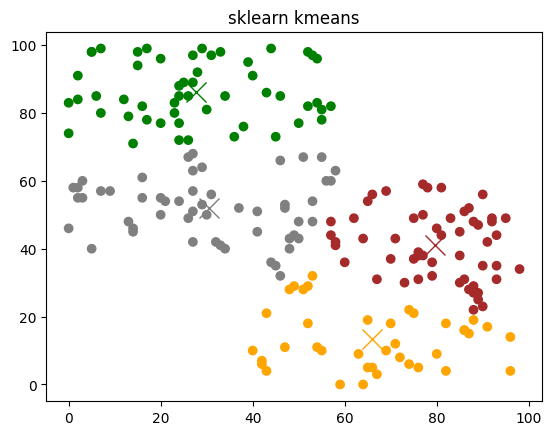

In [25]:
plt.figure()

# draw samples 
plt.scatter(x1,x2, c= colors[predicted])

# draw centroids 
for i, c in enumerate (clf.cluster_centers_):    
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
    
plt.title ('sklearn kmeans')


<font color = green >

## Sample: Image compression with Kmeans

</font>

Each pixel is represented as the red, green and blue intensity values (RGB). This contains thousands of colors and the task is to reduce the number of colors. By making this reduction, it is possible to represent (compress) the photo in an efficient way. Specifically, store the RGB values of the 16 selected colors, and only store the index of the color for each pixel in the image. 

<font color = green >

### Load image

</font>

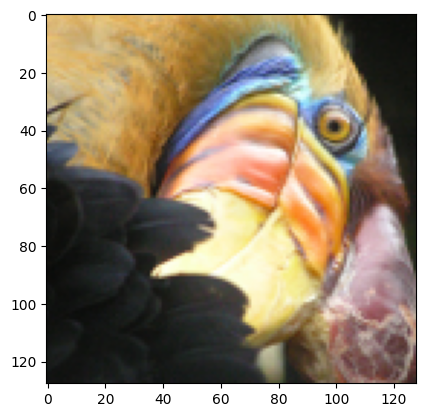

In [26]:
import os

cwd= os.getcwd() # current working directory
# path = os.path.join(cwd,'data')
fn= 'bird_small.png' #  os.path.join(path , 'bird_small.png')
image = np.array(plt.imread(fn))
plt.figure()
plt.imshow(image)

<font color = green >

### Review image data

</font>

In [27]:
image.shape

(128, 128, 3)

<font color = green >

### Reshape image to flatten all pixels

</font>

In [28]:
print ('image.shape:',image.shape)
img_reshaped = image.reshape (-1, 3) # flatten all pixels 
print ('img_reshaped.shape:',img_reshaped.shape)

image.shape: (128, 128, 3)
img_reshaped.shape: (16384, 3)


<font color = green >

### Apply Kmeans

</font>

In [29]:
from sklearn.cluster import KMeans

In [30]:
clf= KMeans(n_clusters=32).fit(img_reshaped)
print ('Cenroids:')
centroids = clf.cluster_centers_  
centroids

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cenroids:


array([[0.5780101 , 0.5122914 , 0.48863232],
       [0.16853613, 0.16868466, 0.1600967 ],
       [0.838485  , 0.73537624, 0.5218008 ],
       [0.8505447 , 0.7015606 , 0.41152346],
       [0.4712054 , 0.33365476, 0.14896819],
       [0.913262  , 0.52762926, 0.18807489],
       [0.78768784, 0.60940206, 0.3101573 ],
       [0.9847761 , 0.96666324, 0.86078024],
       [0.551587  , 0.6968543 , 0.861137  ],
       [0.30520126, 0.31428277, 0.34893706],
       [0.70861477, 0.508269  , 0.2197681 ],
       [0.34425938, 0.40652838, 0.5815936 ],
       [0.9530313 , 0.8896179 , 0.59540075],
       [0.47669685, 0.42583495, 0.3997199 ],
       [0.59345865, 0.43413067, 0.18225533],
       [0.6603825 , 0.5996321 , 0.5777294 ],
       [0.9786516 , 0.7888788 , 0.6838074 ],
       [0.07297146, 0.07929647, 0.06896189],
       [0.6766554 , 0.5658959 , 0.37030426],
       [0.45083603, 0.3460283 , 0.2835078 ],
       [0.35310704, 0.25170228, 0.19306412],
       [0.7687639 , 0.6855016 , 0.66538227],
       [0.

<font color = green >

### Assign the one of $K$ color to every pixel 

</font>

In [31]:
predicted_colors = clf.predict(img_reshaped) # closest centroid for every pixel 
print  (predicted_colors.shape)
predicted_colors

(16384,)


array([ 3, 26,  3, ...,  1,  1,  1])

<font color = green >

### Visualize the compressed image 

</font>

Essentially centroids and predicted_colors are values necessary to store compressed image  


In [32]:
img_recovered= centroids[predicted_colors] # assign to every pixel the values of closest centroid
print ('img_recovered.shape:', img_recovered.shape)
img_recovered # note values are the same for pixels assigned to the same centroid

img_recovered.shape: (16384, 3)


array([[0.8505447 , 0.7015606 , 0.41152346],
       [0.9490714 , 0.76762116, 0.48352528],
       [0.8505447 , 0.7015606 , 0.41152346],
       ...,
       [0.16853613, 0.16868466, 0.1600967 ],
       [0.16853613, 0.16868466, 0.1600967 ],
       [0.16853613, 0.16868466, 0.1600967 ]], dtype=float32)

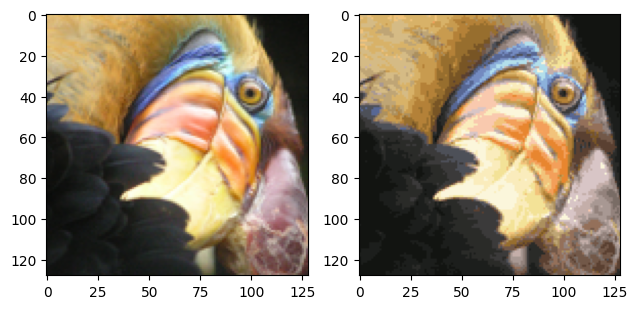

In [33]:
img_recovered_3d = img_recovered.reshape(image.shape[0], image.shape[1], 3)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(img_recovered_3d)
plt.tight_layout()

<font color = green >

## Sample: Titanic classification with Kmeans

</font>

In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns

<font color = green >

### Load data 

</font>

In [35]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train_df = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test_df = pd.read_csv(test_url)

In [36]:
train = train_df.copy()
test = test_df.copy()

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color = green >

### Review missed values 

</font>

In [38]:
def print_missing_srtatistic(): 
    print("train")
    print(train.isnull().sum())
    print("\n")
    print("test")
    print(test.isnull().sum())
print_missing_srtatistic()

train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<font color = green >

### Handle missing values 

</font>
There are following approaches:

- Remove rows with missing values
- <font color = blue>Impute missing values  </font>

In this case lets keep the records since they may contain relevant information
<br>
There are following approaches to <strong>impute missing values </strong>:

- constant value that e.g. 0 (different from all other values)
- corresponding value of randomly selected record
- <font color = blue>mean of all corresponding available values  </font>
- value estimated by another machine learning model

In [39]:
# train.fillna(0, inplace=True)
# test.fillna(0, inplace=True)


# remove rows with missing values
train = train.fillna(0)
test = test.fillna(0)
# train['Cabin'].fillna(0, inplace=True) # Note this fills separate value for every column
# print(train['Cabin'].unique())
# train[nan_columns].fillna(train[nan_columns].mean(), inplace=True) # Note this fills separate value for every column
# test.fillna(test.mean(), inplace=True)


print_missing_srtatistic() # not filled the ones that are not numerical (mean is not available)
# Leave as they are -  will drop those features as irrelevant 

train
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


test
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [40]:
# train.fillna(0, inplace=True)
# test.fillna(0, inplace=True)

# print_missing_srtatistic() 

<font color = green >

### Review features  (optional)

</font>


In [41]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [42]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [43]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


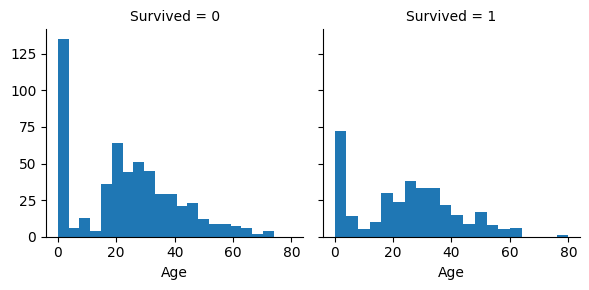

In [44]:
# age has too mane values so use the histogram  
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<font color = green >

### Drop irrelevant features 

</font>

In [45]:
# for demo 
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

<font color = green >

### Convert the features to numerical 

</font>

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


<font color = green >

#### Convert Remaining non-numerical features 

</font>

In [47]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.4 KB


<font color = green >

### Separate lablels

</font>

In [50]:
X_train = np.array(train.drop(['Survived'], axis=1))#.astype(float))
y_train = np.array(train['Survived'])
X_test = np.array(test) # .astype(float)

<font color = green >

### Scale features 

</font>

In [51]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<font color = green >

### Train  model 

</font>

In [52]:
kmeans = KMeans(n_clusters=2) # Survived or Not survived
kmeans.fit(X_train_scaled)

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

<font color = green >

### Evaluate model 

</font>

In [53]:
def compute_train_accuracy():
    y_train_predicted = kmeans.predict(X_train_scaled)
    train_accuracy = np.mean(y_train_predicted== y_train)    
    return train_accuracy

for random_state in range (10):
    kmeans = KMeans(n_clusters=2, random_state=random_state)  # 0 vs 2 
    kmeans.fit(X_train_scaled)    
    print (compute_train_accuracy() )


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7867564534231201
0.7867564534231201
0.7867564534231201


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7867564534231201
0.7867564534231201
0.7867564534231201


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7867564534231201
0.7867564534231201
0.7867564534231201


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.2132435465768799


<font color = green >

### Match clusters to labels

</font>

Consider the majority of correct prediction of train set 

In [54]:
# Clusters indices may appear opposite to prediction labels 
def predict_corrected(X_to_predict):    
    if compute_train_accuracy() > .5:
        return kmeans.predict(X_to_predict)
    else: 
        return 1- kmeans.predict(X_to_predict)


for random_state in range (8):
    kmeans = KMeans(n_clusters=2, max_iter=500, random_state=random_state)  # 0 vs 2 
    kmeans.fit(X_train_scaled)

    y_train_predicted_corrected = predict_corrected(X_train_scaled)
    accuracy_corrected = np.mean(y_train == y_train_predicted_corrected)
    print ('{} ->  {}'.format (compute_train_accuracy(), accuracy_corrected))



c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7867564534231201 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7867564534231201 ->  0.7867564534231201


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7867564534231201 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7867564534231201 ->  0.7867564534231201


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7867564534231201 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<font color = green >

### Predict  test set 

</font>

In [55]:
kmeans.predict(X_test_scaled)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
predict_corrected(X_test_scaled)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
df_res= test.copy()
df_res['Survived'] = pd.Series (predict_corrected(X_test_scaled))
df_res = df_res[['PassengerId', 'Survived']]
df_res.head(20)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [58]:
import os
cwd= os.getcwd() 
# path = os.path.join(cwd,'data') 
fn ='titanic_submission_kmeans.csv' #  os.path.join(path, 'titanic_submission_kmeans.csv') 
df_res.to_csv(fn, index=False)

# Score = 0.76555

<font color = green >

## Home Task: Implement K-means algorithm

</font>


<font color = green >

###  Data 

</font>



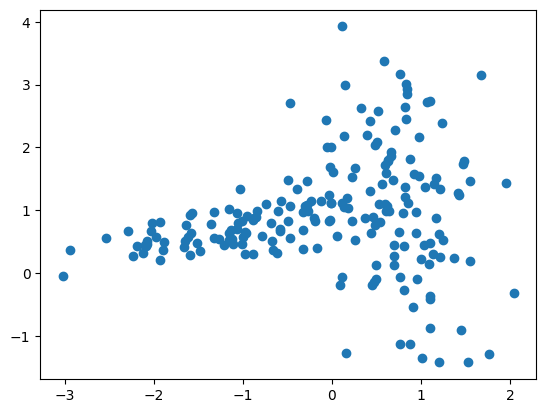

In [59]:
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

<font color = green >

###  Developing own KMeans

</font>



In [139]:
class Custom_KMeans:
    def __init__(self, n_clusters=2, max_iter=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.closest_centroids = None
        self.distances = None
        self.points = None

    def fit(self, points):
        self.points = points
        self.init_centroids()
        return self

    def init_centroids(self):
        if self.random_state is not None:
            np.random.seed(self.random_state) 
        self.centroids = np.array(self.points[np.random.choice(len(self.points), self.n_clusters)])
        return self.centroids

    def compute_distances(self, samples=None, centroids=None):
        if samples is None:
            samples = self.points
        if centroids is None:
            centroids = self.centroids
        return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

    def compute_closest_centroids(self):
        if self.distances is None:
            self.distances = self.compute_distances()
        return np.apply_along_axis(np.argmin,0, self.distances)

    def J(self):

        if self.closest_centroids is None:
            self.closest_centroids = self.compute_closest_centroids()
        all_dist = [] 
        for c_index in set(self.closest_centroids):
            assigned_samples = self.points[np.where(self.closest_centroids==c_index)]# select only points assigned to centroid
            all_dist_centroid = self.compute_distances(assigned_samples, [self.centroids[c_index]])
            all_dist.append(np.sum(all_dist_centroid))
        m = len(self.closest_centroids)
        return 1/m* np.sum(all_dist)

    def compute_means(self):
        new_centroids= []
        for i in range (len(self.centroids)):
            if i not in self.closest_centroids: # no assigned point assigned to this centroid 
                new_centroids.append(self.centroids[i])
            else: 
                new_centroid= np.mean(self.points[np.where(self.closest_centroids==i)], axis = 0)
                new_centroids.append(new_centroid)
        return new_centroids

    def run_k_means(self):
        J_hist = [self.J()]

        while True:
            self.distances = self.compute_distances()
            self.closest_centroids = self.compute_closest_centroids() 
            self.centroids = self.compute_means() 
            new_J = self.J()                
            if J_hist[-1] == new_J:
                break
            else: 
                J_hist.append(new_J)        

        return J_hist
    
    def predict(self, points):
        distances = self.compute_distances(points, self.centroids)
        return np.apply_along_axis(np.argmin,0, distances)



        

<font color = green >

###  Initial data before running KMeans

</font>



In [140]:
clf = Custom_KMeans(n_clusters=3, random_state=1)
clf.fit(Xc_2)
print(clf.J())
print(clf.closest_centroids)

0.8387753071167867
[1 2 1 1 2 0 1 2 2 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 2 1 0 1 1 2 2 2 0 1 1
 0 2 1 0 2 1 1 1 2 0 2 1 1 1 1 1 2 1 1 0 0 1 1 1 2 1 2 2 2 2 1 2 1 1 1 2 1
 2 2 1 1 1 2 1 2 2 2 1 1 2 1 1 1 0 1 1 1 2 1 1 1 1 1 1 0 1 1 2 0 0 2 2 1 2
 1 0 1 2 1 1 1 2 1 1 1 1 2 1 1 0 1 2 0 1 2 2 2 2 1 1 1 1 1 1 2 1 2 1 1 1 0
 1 0 0 1 2 2 1 2 1 2 1 1 1 2 1 2 0 1 1 1 2 2 2 1 1 1 1 0 2 1 0 2 0 1 1 1 1
 1 1 1 0 1 1 1 0 2 1 1 1 1 2 1]


<Figure size 640x480 with 0 Axes>

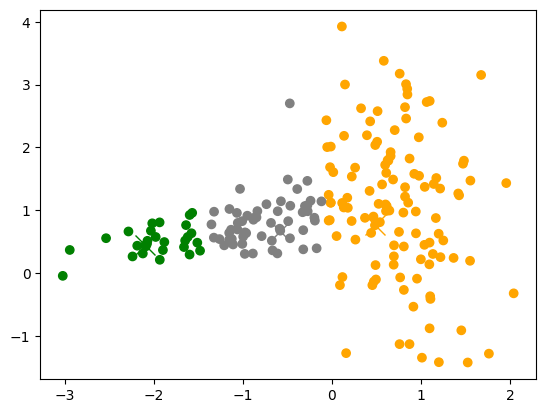

In [141]:
plt.figure()
draw_state(x = clf.points[:,0], y = clf.points[:,1], centroids = clf.centroids, closest_centroids = clf.closest_centroids)

<font color = green >

###  Run KMeans

</font>



Text(0, 0.5, 'Cost function J')

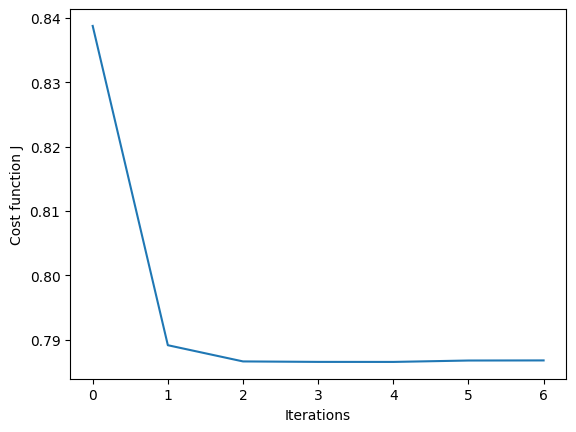

In [142]:
plt.figure()
J_hist = clf.run_k_means()
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost function J')

<font color = green >

###  Plot updated centroids 

</font>



<Figure size 640x480 with 0 Axes>

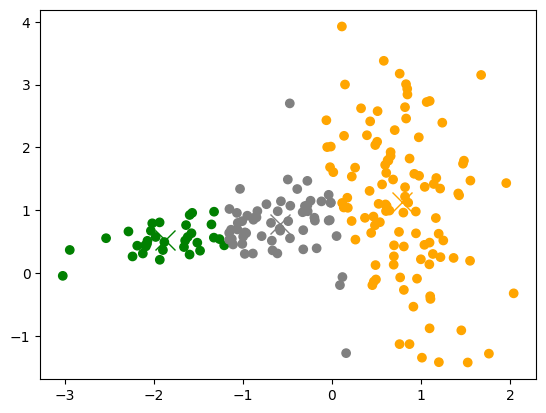

In [143]:
plt.figure()
draw_state(x = clf.points[:,0], y = clf.points[:,1], centroids = clf.centroids, closest_centroids = clf.closest_centroids)

<font color = green >

###  Select best clustering within 100 random initializations 

</font>



In [146]:
clusters = []
for k in range (100):
    clf = Custom_KMeans(n_clusters=4)
    clf.fit(Xc_2)
    J = clf.run_k_means()[-1]
    clusters.append({'J':J, 'clf':clf})

best_cluster = min(clusters, key=lambda x: x['J'])
print('Best cluster has J cost:', best_cluster['J'])

Best cluster has J cost: 0.5996687153603513


[array([ 0.96220912, -0.18860474]), array([-1.46901201,  0.59888478]), array([0.76885808, 2.14333659]), array([0.0467027 , 0.99993105])]


<Figure size 640x480 with 0 Axes>

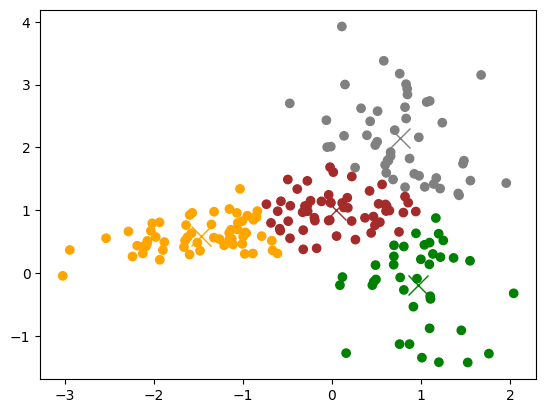

In [ ]:
best_clf = best_cluster['clf']
plt.figure()
draw_state(x = best_clf.points[:,0], y = best_clf.points[:,1], centroids = best_clf.centroids, closest_centroids = best_clf.closest_centroids)
print(best_clf.centroids)

<font color = green >

###  Predict test set 

</font>



[0 0 0 0 0 3 0 0 0 1]


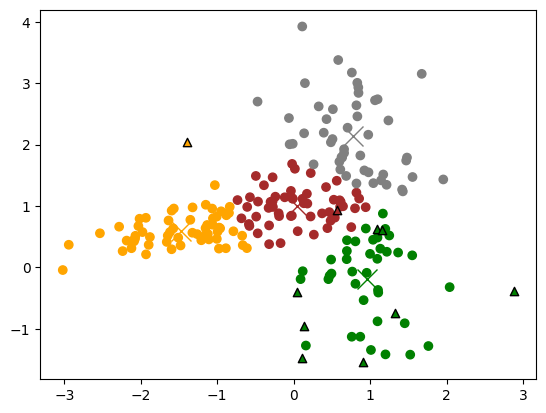

In [ ]:
test_points, _ = make_classification(n_samples=10,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=56,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
x_test = test_points[:,0]
y_test = test_points[:,1]
draw_state(x = best_clf.points[:,0], y = best_clf.points[:,1], centroids = best_clf.centroids, closest_centroids = best_clf.closest_centroids)
predict_colors = ['red', 'blue', 'orange', 'yellow']
predicted = best_clf.predict(test_points)


for i, p in enumerate(test_points):
    plt.scatter(p[0], p[1], marker = '^', color= colors[predicted[i]], edgecolor='black')
print(predicted)

<font color = green >

## Learn more
</font>

[K-means clustering: how it works](https://www.youtube.com/watch?v=_aWzGGNrcic)

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


[K-Means Clustering in Python with scikit-learn](https://www.datacamp.com/community/tutorials/k-means-clustering-python)